## Reto 4: Graficando múltiples axis

### 1. Objetivos:
    - Usar subplots para graficar múltiples gráficas de barras al mismo tiempo
 
---
    
### 2. Desarrollo:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/My Drive/Datasets/melbourne_housing-clean.csv")
df.head()

,Unnamed: 0,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
crosstab = pd.crosstab(df["region_name"], df["type"])
crosstab

type,h,t,u
region_name,,,
Eastern Metropolitan,863,102,159
Eastern Victoria,33,0,3
Northern Metropolitan,2332,290,796
Northern Victoria,21,1,0
South-Eastern Metropolitan,224,20,28
Southern Metropolitan,2360,386,1478
Western Metropolitan,1908,226,394
Western Victoria,21,0,1


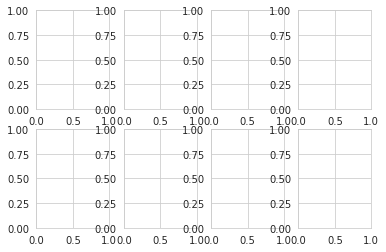

In [7]:
fig, axes = plt.subplots(2, 4)

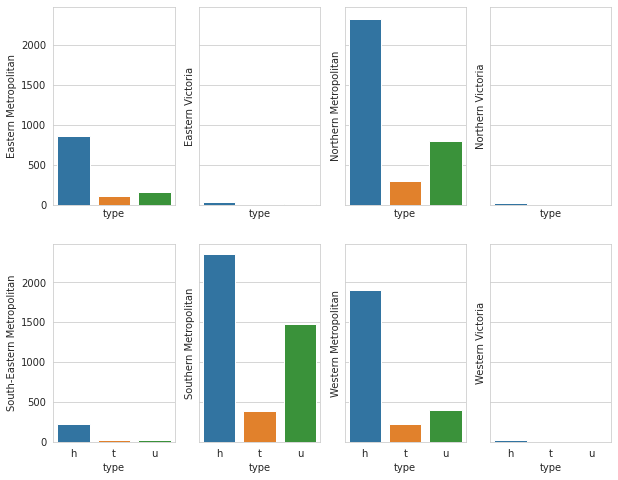

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=crosstab.columns, y=crosstab.loc["Eastern Metropolitan"], ax=axes[0, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc["Eastern Victoria"], ax=axes[0, 1])
sns.barplot(x=crosstab.columns, y=crosstab.loc["Northern Metropolitan"], ax=axes[0, 2])
sns.barplot(x=crosstab.columns, y=crosstab.loc["Northern Victoria"], ax=axes[0, 3])
sns.barplot(x=crosstab.columns, y=crosstab.loc["South-Eastern Metropolitan"], ax=axes[1, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc["Southern Metropolitan"], ax=axes[1, 1])
sns.barplot(x=crosstab.columns, y=crosstab.loc["Western Metropolitan"], ax=axes[1, 2])
sns.barplot(x=crosstab.columns, y=crosstab.loc["Western Victoria"], ax=axes[1, 3]);

En el Reto pasado generamos tablas de contingencia para segmentar nuestros datos usando dos o más variables categóricas. El problema con nuestras gráficas es que resultaba muy incómodo e ineficiente compararlas. Una manera mucho más efectiva de comparar varias gráficas es graficarlas en la misma figura. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea una tabla de contingencia donde el índice esté dado por la variable 'region_name' y las columnas por la variable 'type'. Esto nos va a dar una tabla donde tenemos la frecuencia de cada tipo de propiedad segmentada por regiones.
3. Genera una figura con 8 subplots para hacer gráficas de barras de cada región en nuestro dataset. Cada gráfica tendrá 3 barras, correspondiendo a los tipos 'h', 't' y 'u'.
4. Asegúrate de que compartan eje `x` y `y` para que sea fácil compararlas. Además agrega anotaciones y títulos donde creas necesario.
5. Describe tus hallazgos y comparte con tus compañeros qué podrían significar.

<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
regionname_type = pd.crosstab(df['region_name'], [df['type']])

fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)

sns.barplot(regionname_type.loc['Eastern Metropolitan'].index, regionname_type.loc['Eastern Metropolitan'], ax=axes[0, 0])
sns.barplot(regionname_type.loc['Eastern Victoria'].index, regionname_type.loc['Eastern Victoria'], ax=axes[0, 1])
sns.barplot(regionname_type.loc['Northern Metropolitan'].index, regionname_type.loc['Northern Metropolitan'], ax=axes[0, 2])
sns.barplot(regionname_type.loc['Northern Victoria'].index, regionname_type.loc['Northern Victoria'], ax=axes[0, 3])
sns.barplot(regionname_type.loc['South-Eastern Metropolitan'].index, regionname_type.loc['South-Eastern Metropolitan'], ax=axes[1, 0])
sns.barplot(regionname_type.loc['Southern Metropolitan'].index, regionname_type.loc['Southern Metropolitan'], ax=axes[1, 1])
sns.barplot(regionname_type.loc['Western Metropolitan'].index, regionname_type.loc['Western Metropolitan'], ax=axes[1, 2])
sns.barplot(regionname_type.loc['Western Victoria'].index, regionname_type.loc['Western Victoria'], ax=axes[1, 3])
```
    
</details>